# LEPL1106, Devoir 1 : Introduction au traitement numérique des signaux et systèmes

## 0) Introduction

Ce premer devoir a pour objectif de vous familiariser avec le traitement numérique de signaux et systèmes en `Python`. Pour créer, stocker, et opérer sur les signaux, on utilisera le package [NumPy](http://www.numpy.org/) de Python, typiquement abrévié par `np`.  Pour afficher les signaux, on utilisera la librairie [Matplotlib](https://matplotlib.org/index.html), aussi connue sous le doux nom de `plt`.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

Les signaux seront stockés dans des vecteurs numpy ("numpy arrays").
On peut créer un vecteur d'indices entiers discrets $n \in \mathbb Z$ allant de $a$ à $b$ en écrivant
`n = np.arange(a,b+1)`

In [53]:
a = -5
b = 5
n = np.arange(a,b+1)
print("indices n :",n)

indices n : [-5 -4 -3 -2 -1  0  1  2  3  4  5]


Notez que dans ces devoirs, nous travaillons avec le traitement **numérique** de signaux et de systèmes. Cela signifie que nous ne travaillerons qu'avec des signaux en temps discret, le traitement de signaux en temps continu étant laissés pour des analyses analytiques en séances d'exercices. Dans de nombreux cas, les signaux en temps discret seront des approximations de signaux en temps continu. Le lien entre les deux types sera vu à partir de la 

Avec quelques autres fonctionnalités élémentaires comme `np.zeros` ou `np.ones`, on peut facilement créer des signaux "de base". Par exemple, voici une fonction qui calcule l'échelon $u[n]$ (ou, également, [Fonction de Heaviside](https://fr.wikipedia.org/wiki/Fonction_de_Heaviside)), défini comme
$$ u[n] = \begin{cases} 1 & \text{si } n \geq 0, \\ 0 & \text{sinon.} \end{cases} $$

**Remarque:**
Dans les devoirs pour ce cours, nous travaillerons surtout la *compréhension* des concepts utilisés, ainsi que la *rigeur dans la présentation* (par exemple, la création de graphes *complets* et *lisibles*). Nous ferons donc moins attention aux *détails d'implémentation* et les questions d'*efficacité* du code écrit.

Néanmoins, c'est un critère important dans le métier d'ingénieur, et nous donnerons parfois quelques conseils à ce propos. Par exemple, nous donnons trois implémentations différentes de `heaviside` (les deux premières en commentaire). La première implémentation est une implémentation typique d'étudiant, peu concise et peu efficace à cause de la boucle `for` explicite. La deuxième implémentation est un code [vectorisé](https://en.wikipedia.org/wiki/Array_programming) (qui tire profit des opérations vectorielles efficaces de numpy), beaucoup plus compact et rapide, mais est peut-être un peu plus difficile à interpréter pour un humain non aguerri qui lirait le code. La troisième implémentation (non commentée) est une proposition de compromis entre l'efficacité (code vectorisé) et la lisibilité du code.

In [54]:
def heaviside(n):
    """
    Calcule la fonction échelon (Heaviside step function en anglais),
    définie comme u[n] = 1 si n >= 0, u[n] = 0 sinon.
    
    Arguments
    ---------
    n: numpy array contenant des indices (entiers) auxquels on applique la fonction échelon.
    
    Retourne
    --------
    result: numpy array de même taille contentant les valeurs u[n]
    """
    
    ## Version "noob"
    ## ==============
    # result = np.zeros(n.shape) # crée un array de zéros de la même taille que n
    # for i in range(n.size):    # (quelle est la différence entre "size" et "shape" ?)
    #     if n[i] >= 0:
    #         result[i] = 1.
    # return result
    
    ## Version "pro"
    ## ==============
    # return (n >= 0).astype(float)  # (n >= 0) est un array de booléens qu'on convertit en 0./1. via astype
    
    ## Version "compromis efficacité <-> interprétabilité"
    ## ==============
    result = np.zeros(n.shape) 
    result[n >= 0] = 1.        # modifie "result" aux indices où "n>=0" vaut "True"
    return result
    

# On applique la fonction à notre vecteur n calculé plus haut
u = heaviside(n)
print("échelon appliqué aux indices n :",u)

échelon appliqué aux indices n : [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


Remarquez le [docstring](https://realpython.com/documenting-python-code/#documenting-your-python-code-base-using-docstrings) (le commentaire entre triple guillemets qui suit la définition de la fonction) qui sert à documenter l'usage de la fonction. On peut ainsi accéder à cette documentation en tapant `help(nomDeLaFonction)` (essayez par vous-mêmes avec quelques fonction de numpy, par exemple !).

Dans ce cours, nous vous demanderons d'écrire un docstring *structuré* et *rigoureux* pour toutes les fonctions que vous créerez. C'est une bonne habitude à entrainer.

In [55]:
help(heaviside)

Help on function heaviside in module __main__:

heaviside(n)
    Calcule la fonction échelon (Heaviside step function en anglais),
    définie comme u[n] = 1 si n >= 0, u[n] = 0 sinon.
    
    Arguments
    ---------
    n: numpy array contenant des indices (entiers) auxquels on applique la fonction échelon.
    
    Retourne
    --------
    result: numpy array de même taille contentant les valeurs u[n]



Voici finalement une démo de quelques fonctionalités de matplotlib (c'est juste un exemple, pas un template à copier-coller sans réfléchir). **Nous vous encourageons à explorer les possibilités de cette librairie au maximum et de ne pas vous contenter du minimum syndical.** Faire des graphes de qualité est une compétence qui vous servira dans pratiquement tous vos cours (et après).

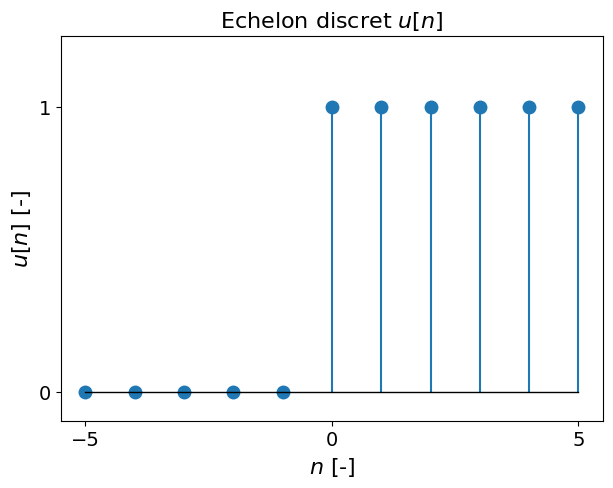

In [56]:
# Creation de ma figure en précisant la taille
plt.figure(figsize=(7,5))

## LES INDISPENSABLES

# On récupère les différentes composantes du plot (markerline, stemlines, baseline) pour les modifier par après
markerline, stemlines, baseline = plt.stem(n,u)

# Axes
fs_text = 16 # Taille du texte
plt.xlabel("$n$ [-]", fontsize=fs_text)
plt.ylabel("$u[n]$ [-]", fontsize=fs_text)

# Titre
plt.title("Echelon discret $u[n]$", fontsize=fs_text)

## LES TOUCHES BONUS
effectuer_touches_bonus = True # Essayez de passer ceci en "False" pour voir la différence
if effectuer_touches_bonus:
    # Gestion de la "baseline" (axe horizontal)
    baseline.set_color('k')   # Baseline noir (par défaut c'est rouge, pas très beau)
    baseline.set_linewidth(1) # Diminuer la largeur de la baseline (par défaut = 2), un peu imposante par défaut
    
    # Gestion des "markerlines" ("bouboules")
    markerline.set_markersize(9) # On grossit un peu pour mettre en évidence la forme du signal
    
    # "De-zoomer" l'axe y pour être moins écrasés
    plt.ylim((-0.1,1.25))
    
    # Gestion des 'ticks' (valeurs chiffrées attachées aux axes)
    fs_ticks = 14 # Taille des chiffres (un peu petits par défaut)
    # En x, on demande de mettre un "tick" tous les multiples de 5 (par défaut ici c'était tous les multiples de 2.5)
    # mais vu que n est un entier, ça a peu de sens d'afficher des valeurs non-entières !
    plt.xticks(n[::5],fontsize=fs_ticks)
    # En y, comme il n'y a que deux valeurs possibles (0 et 1), on n'affiche que ces valeurs-là
    plt.yticks([0,1],fontsize=fs_ticks)
    

# Affichage de la figure
plt.show()

*Passons maintenant à quelques exercices.*

## 1) Créer un signal (fenêtre temporelle en temps discret)

On vous demande d'écrire une fonction `window(n,n0,n1)` qui calcule la "fênetre rectangulaire temporelle" en temps discret entre $n_0$ et $n_1 > n_0$, et d'amplitude $A$.

$$ w[n] = A\cdot(u[n - n_0] - u[n - n_1]) = \begin{cases} A & \text{si } n_0 \leq n < n_1, \\ 0 & \text{sinon.}  \end{cases} $$

N'oubliez pas (comme pour toutes les fonctions que vous écrirez) de compléter le "docstring" de la fonction.

In [57]:
def window(n,n0,n1,A):
    """
    Calcule la fenêtre rectangulaire temporelle en temps discret, définie comme
    w[n] =  `A` si `n0` <= `n` < `n1`  et  0 sinon
    pour chaque indice de `n`.
    
    Arguments
    ---------
    `n` : ndarray
        Contient les indices (entiers) auxquels on applique la fenêtre temporelle
    `A` : int
        Valeur du signal à l'intérieur de la fenêtre temporelle
    `n0`, `n1`: int
        Respectivement les bornes inférieures et supérieures de la fenêtre
    
    Retourne
    --------
    result : ndarray
        Numpy array de la même taille que n contenant les valeurs de w[n]
    """
    return np.where((n>=n0) & (n<n1), A, 0)


In [58]:
# Test
n0 = -3
n1 = 2
A = 2
print("Indices n testés : ",n)
print("Fenetre obtenue  : ",window(n,n0,n1,A))


Indices n testés :  [-5 -4 -3 -2 -1  0  1  2  3  4  5]
Fenetre obtenue  :  [0 0 2 2 2 2 2 0 0 0 0]


## 2) Création d'une figure

Complétez la fonction `plotWindow(n,w,name)`, qui crée et sauvegarde un graphe du signal "fenêtre discrète" `w` entre `n0` et `n1` calculé sur les indices `n` (on suppose donc que `w = window(n,n0,n1,A)`, calculé au préalable). Indiquez les paramètres `n0`, `n1` et `A` visuellement sur le graphe. La figure obtenue est sauvegardé au format `png` portant le nom `name`; la sauvegarde est déjà implémentée pour vous (quand vous testez votre fonction "en local", vous pouvez remplacer cette ligne par `plt.show()`, mais n'oubliez pas de re-remplacer par la sauvegarde avant de soumettre sur inginious !). Vous pouvez vous baser sur l'exemple de code ci-dessus. 

In [59]:
def plotWindow(n,w,name):
    """
    Sauvegarde et affiche un graphe du signal "fenêtre discrète" w[n] entre `n0` et `n1`.

    Arguments
    ---------
    `n` : ndarray
        Contient des indices entiers
    `w` : ndarray
        Contient les valeurs correspondantes pour chaque entier de n de la fenêtre discrète
    `name` : str
        Nom de la sauvegarde à enregistrer
    
    Retourne
    --------
    Crée une sauvegarde du graphe généré au nom `name` dans le même dossier que le fichier contenant ce code si `local` est `False`

    Affiche le graphe généré à l'écran si `local` est `True`

    Notes
    -----
    Le bon fonctionnement de cette fonction n'est assuré que lorsque la première et dernière valeur de w (w[0], w[-1]) sont nulles.
    """

    # Recherche des paramètres de w
    new_n0 = n[np.where(w!=0)[0][0]]
    new_n1 = n[np.where(w!=0)[0][-1]+1]
    new_A = w[np.where(w!=0)[0][0]]

    # Si local est False, le graphique sera enregistré
    local = False

    # Création de la figure, taille fixe
    plt.figure(figsize=(8,4))
    
    # Récupération des données et création du plot
    _, _, baseline = plt.stem(n,w)
    
    # Axes et taille de police
    fs = 16
    plt.xlabel("$n$", fontsize=fs-3)
    plt.ylabel("$w[n]$", fontsize=fs-3)

    # Esthétique de la "baseline"
    baseline.set_color('k')
    baseline.set_linewidth(1)

    # Gestion des ticks sur l'horizontale (on n'affiche pas 0 s'il n'est pas dans n, pour éviter les erreurs)
    if 0 in n:
        plt.xticks([0,new_n0,new_n1],["0",f"$n0$\n{new_n0}",f"$n1$\n{new_n1}"])
    else:
        plt.xticks([new_n0,new_n1],[f"$n0$\n{new_n0}",f"$n1$\n{new_n1}"])
    
    # Gestion des ticks sur la verticale
    plt.yticks([0,new_A],["0",f"A = {new_A}"])
    plt.subplots_adjust(bottom=0.2)

    # Titre
    plt.title(f"Fenêtre temporelle entre ${new_n0}$ et ${new_n1}$", fontsize=fs)

    # Affichage du graphe
    if local:
        plt.show()
    else :
        plt.savefig(name, dpi=200, format='png')
    
    return


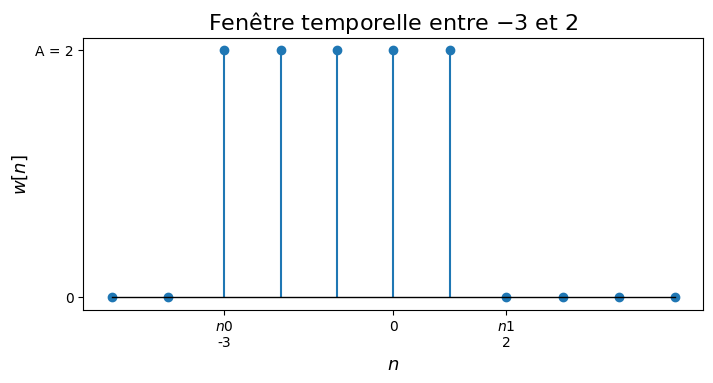

In [60]:
# Test
plotWindow(n,window(n,n0,n1,A),"test_figure_devoir_01")